In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats   

In [2]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
concrete = pd.read_excel("Concrete_Data.xls")

In [4]:
concrete.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


# renaming all features

In [6]:
concrete.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [7]:
concrete

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [8]:
concrete.shape

(1030, 9)

In [9]:
concrete.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

In [10]:
concrete.duplicated().sum()

25

In [11]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFurnace      1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   courseAggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [12]:
concrete.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [13]:
corr = concrete.corr()
corr

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blastFurnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
courseAggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fineaggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

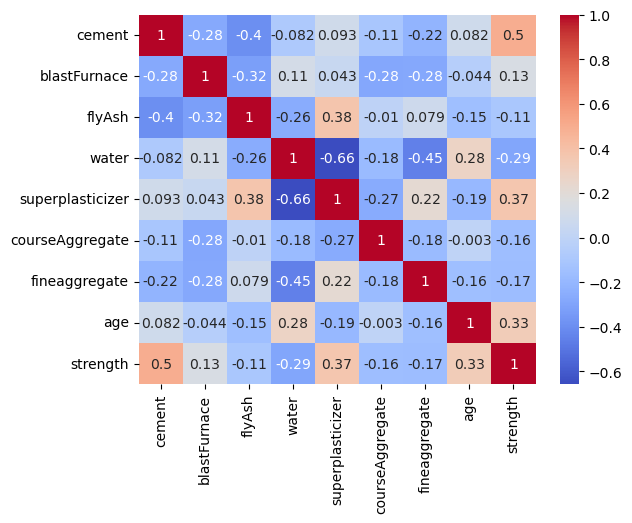

In [14]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

# Train test split

In [16]:
x = concrete.drop("strength", axis=1) ##Here we drop the output features and only keep the input features
y = concrete["strength"]  ##Here we shows only the output features

In [17]:
x.shape   ##here we drop the output

(1030, 8)

In [18]:
y.shape

(1030,)

In [19]:
# Here we import split function from sklearn
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Plotting the distribution:

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


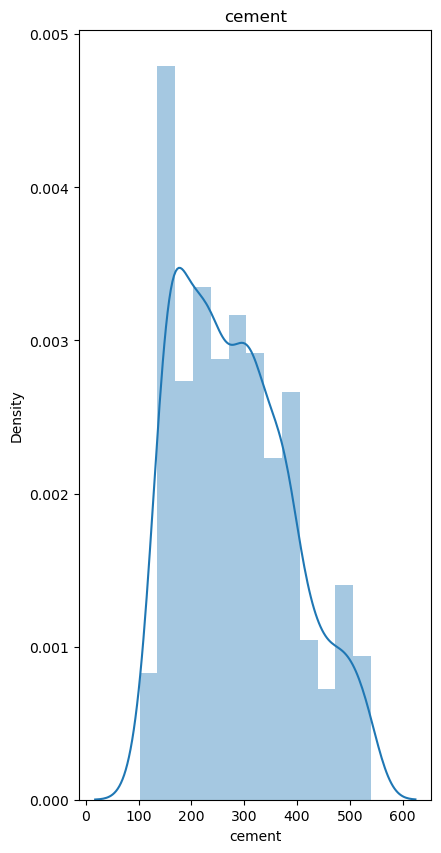

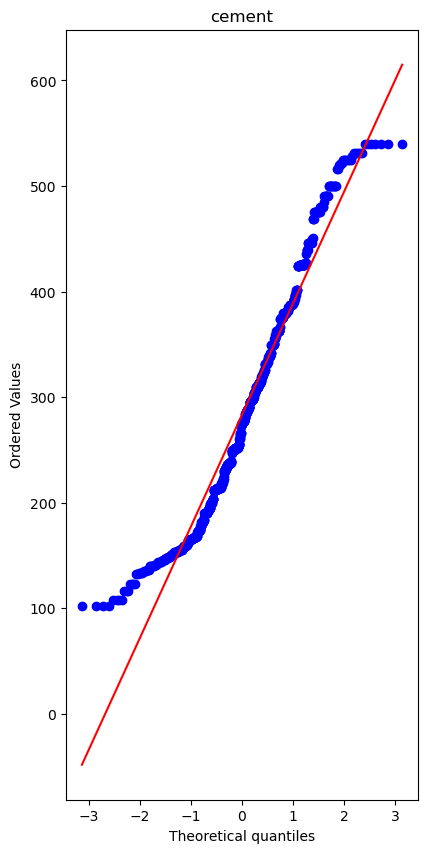

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


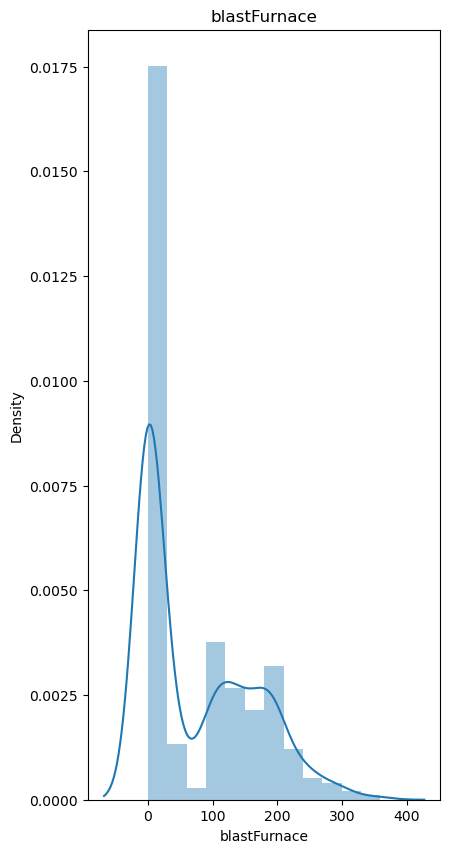

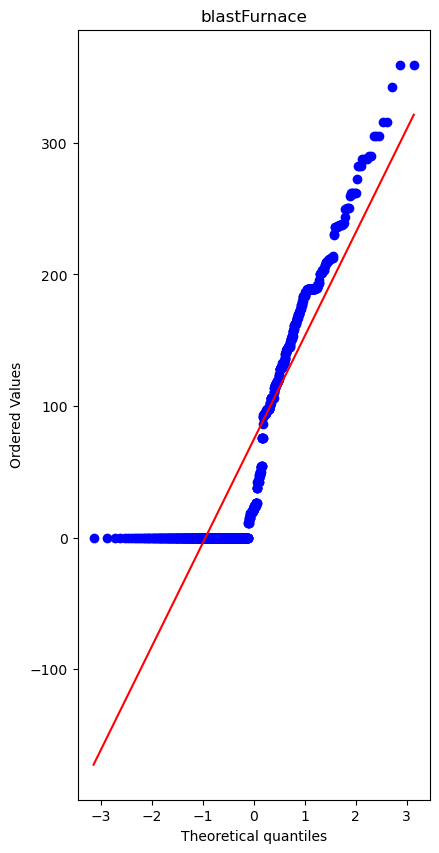

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


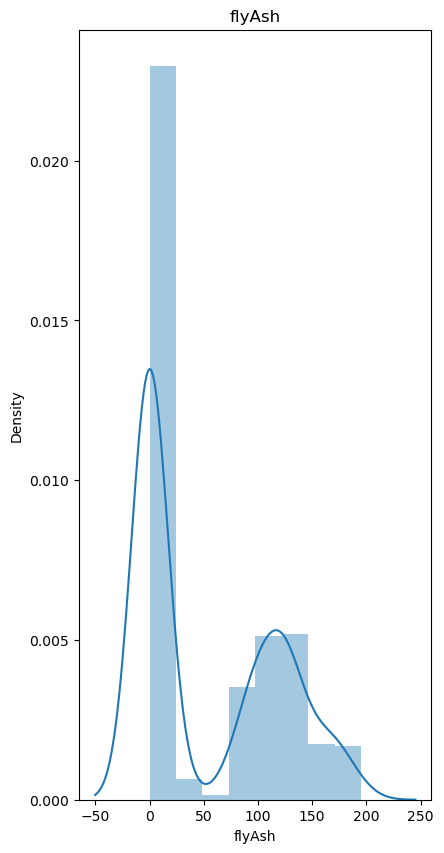

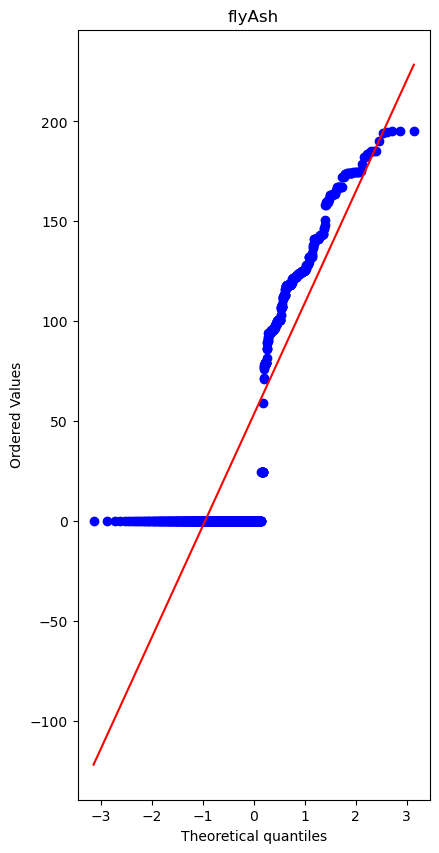

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


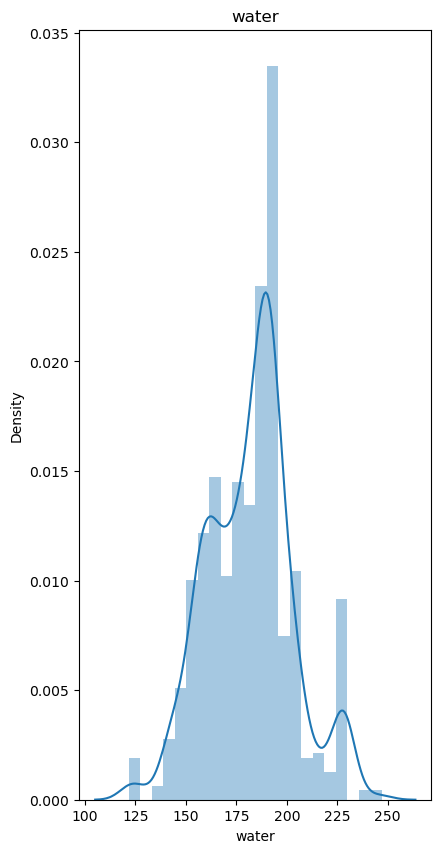

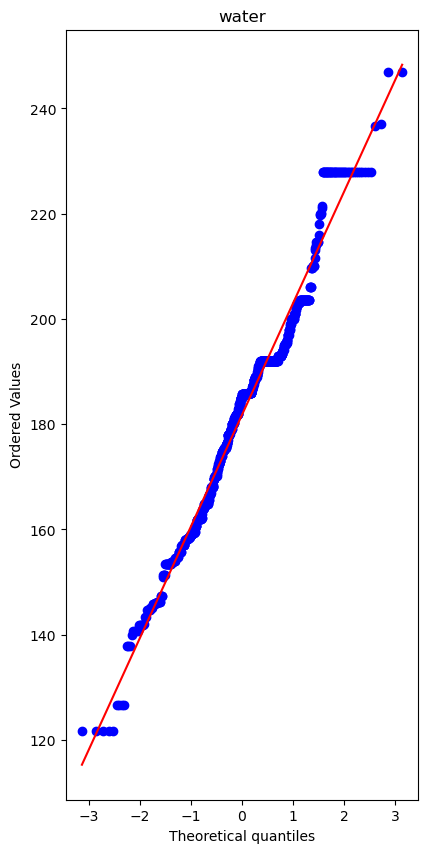

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


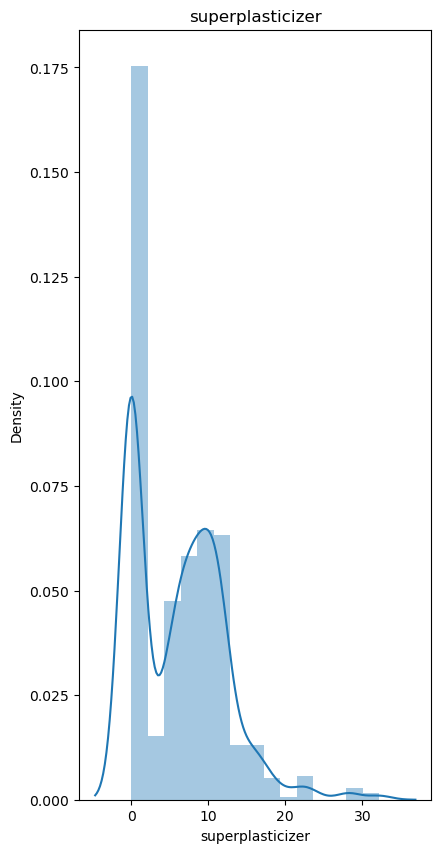

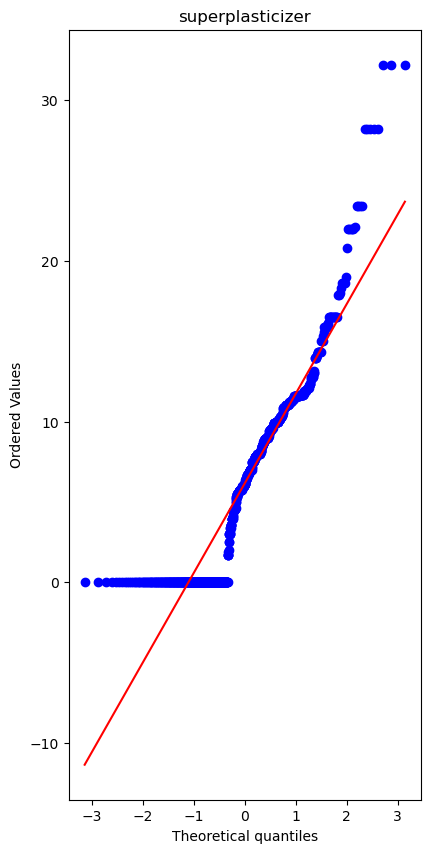

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


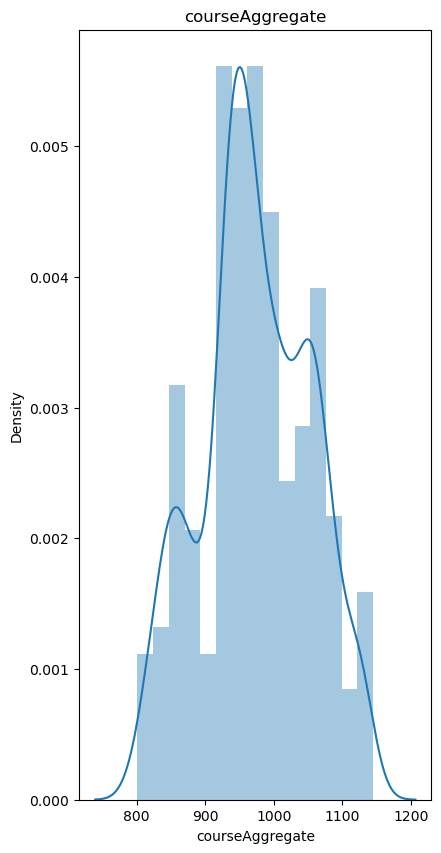

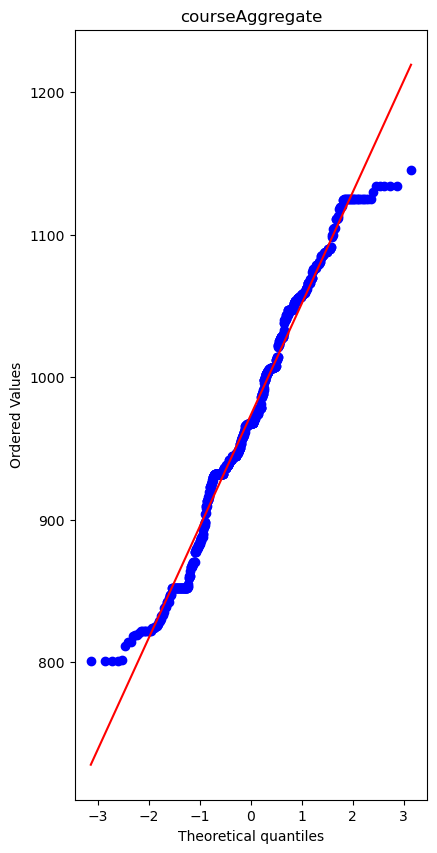

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


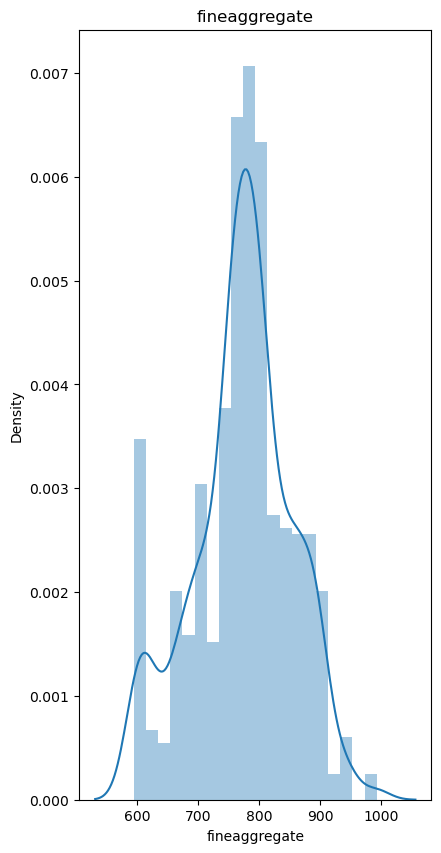

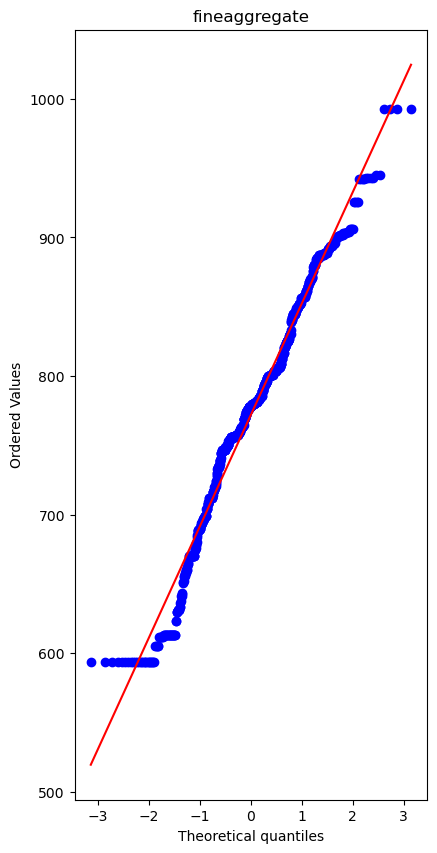

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\1011107172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


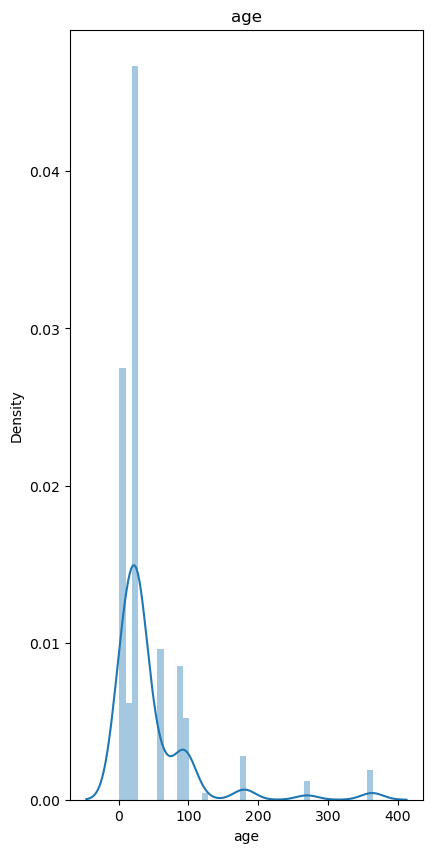

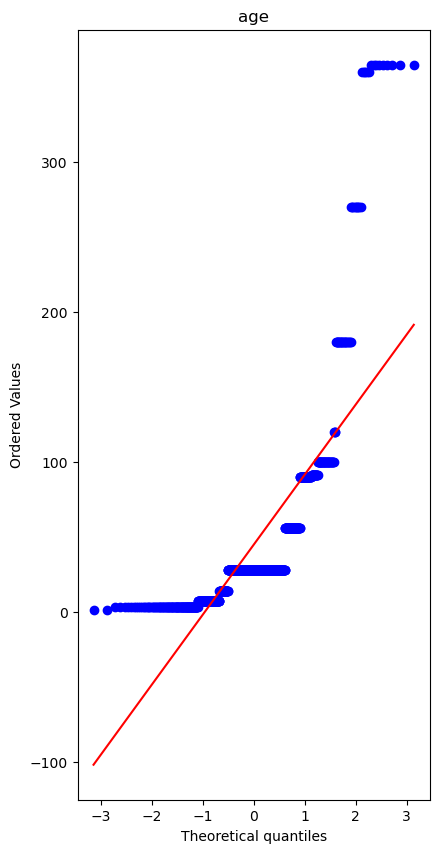

In [22]:
for col in X_train.columns:
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    
    plt.figure(figsize=(10,10))
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

# Applying Power Transformation:

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [25]:
X_train_transformed = pt.fit_transform(X_train)
X_test_transoformed = pt.transform(X_test)

In [26]:
X_train_transformed

array([[-1.27972171,  1.01817459,  1.13100159, ..., -0.26249622,
        -0.67754738,  0.10577763],
       [ 1.24481896,  0.22256194,  1.16667886, ..., -1.91272337,
        -0.31403933,  0.10577763],
       [ 0.07950589, -1.05700975,  1.14353097, ...,  1.01841286,
         0.02598101, -1.664976  ],
       ...,
       [-0.84411355, -1.05700975,  1.15211601, ...,  1.34537397,
         0.29718076,  1.25751143],
       [ 1.56573286,  0.92179935, -0.88493157, ..., -1.53725058,
         0.07623473,  0.10577763],
       [ 0.42656572, -1.05700975,  1.12368097, ..., -0.62083037,
         0.09513185,  0.10577763]])

# Again Distribution

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


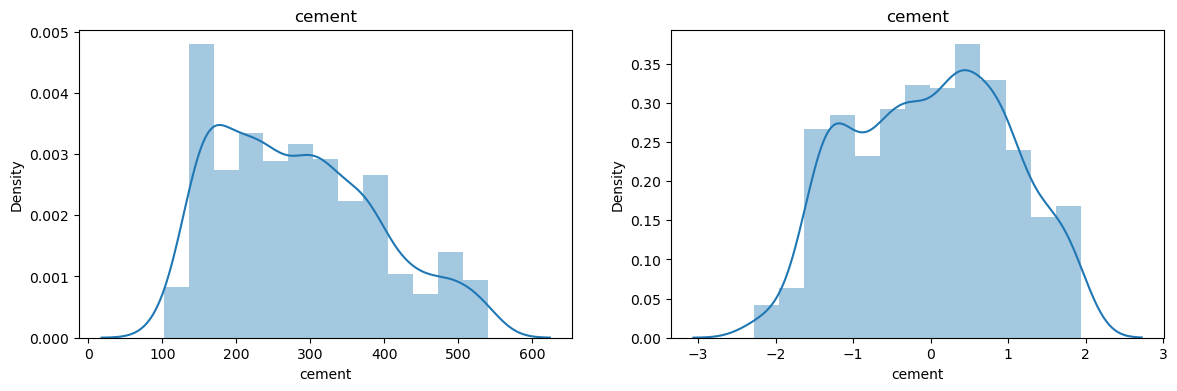

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


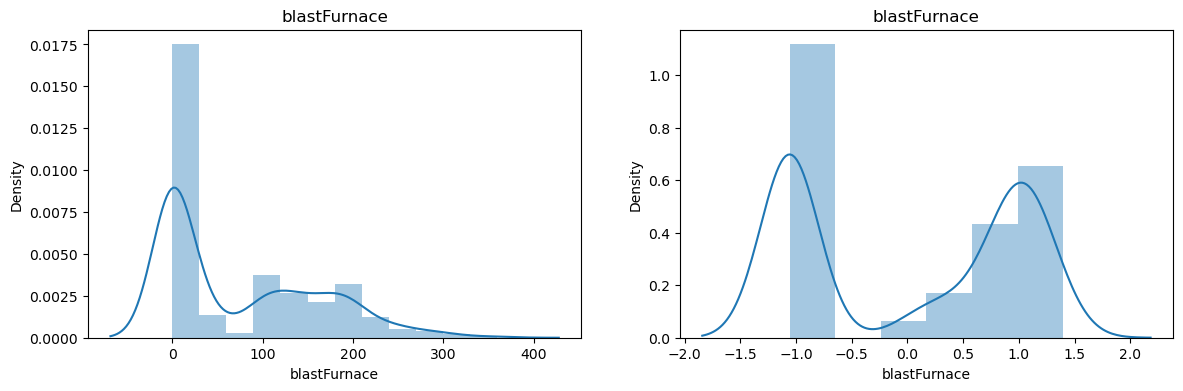

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


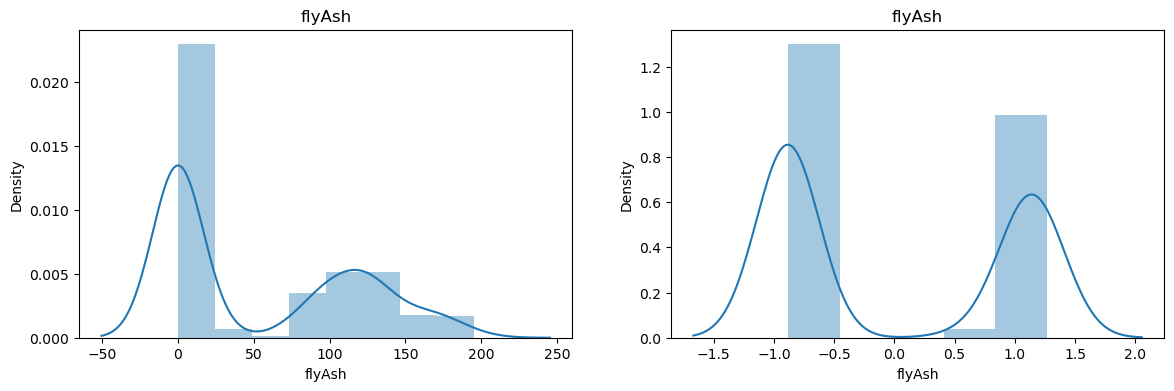

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


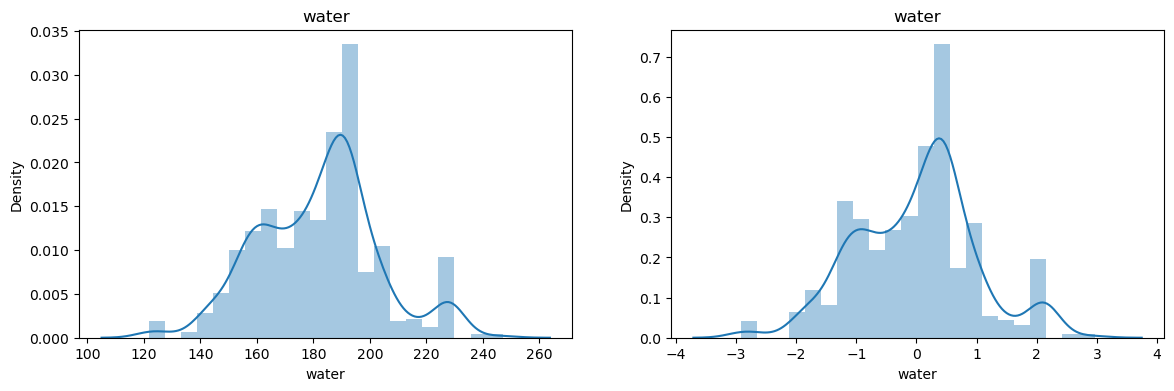

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


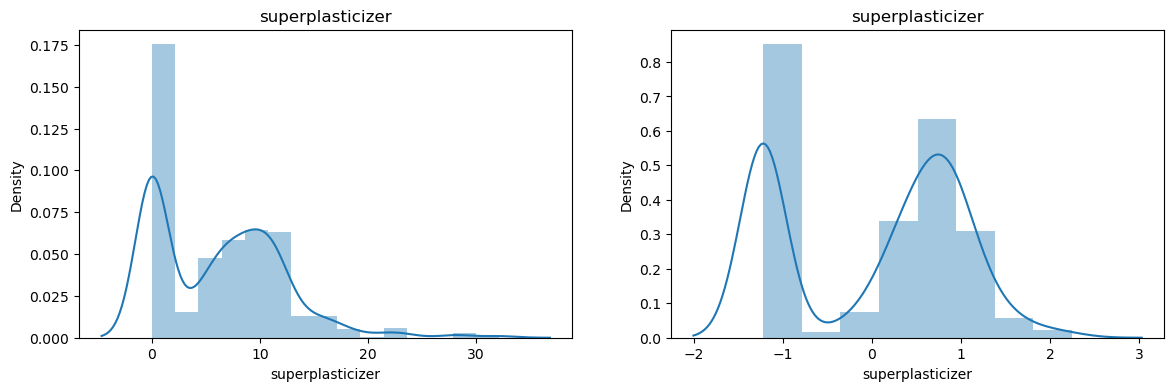

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


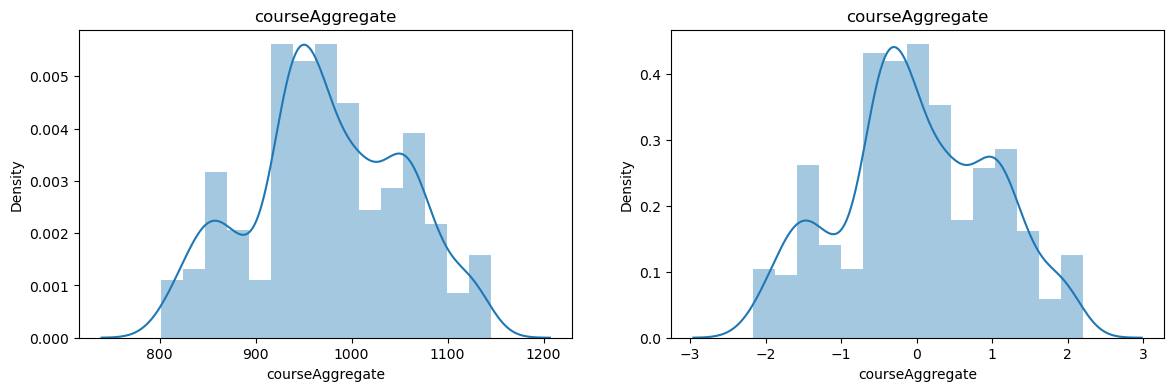

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


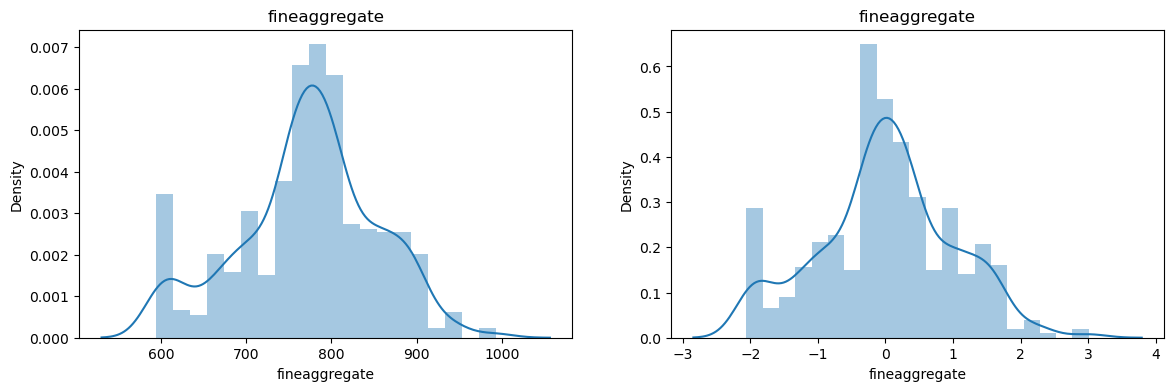

C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\hrith\AppData\Local\Temp\ipykernel_8940\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


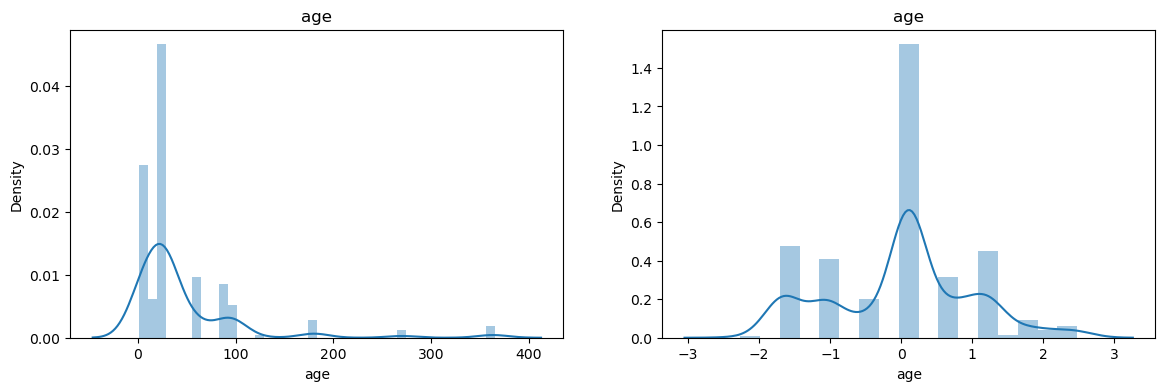

In [28]:
# input_features (input)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
 
    
    
#     # QQ plot
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    plt.show()

# Scaling (Standard Scalar)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
# Apply transform to both the training set and the test set.
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transoformed = scaler.fit_transform(X_test_transoformed)

In [33]:
X_train_transformed

array([[-1.27972171,  1.01817459,  1.13100159, ..., -0.26249622,
        -0.67754738,  0.10577763],
       [ 1.24481896,  0.22256194,  1.16667886, ..., -1.91272337,
        -0.31403933,  0.10577763],
       [ 0.07950589, -1.05700975,  1.14353097, ...,  1.01841286,
         0.02598101, -1.664976  ],
       ...,
       [-0.84411355, -1.05700975,  1.15211601, ...,  1.34537397,
         0.29718076,  1.25751143],
       [ 1.56573286,  0.92179935, -0.88493157, ..., -1.53725058,
         0.07623473,  0.10577763],
       [ 0.42656572, -1.05700975,  1.12368097, ..., -0.62083037,
         0.09513185,  0.10577763]])

# Training Models:-

In [35]:
# pip install xgboost

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [37]:
# for checking the accuracy and performance we have import below line
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score
from math import sqrt

In [38]:
# Define the regression models
models = {
    'lin_reg': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'rf_reg': RandomForestRegressor(n_estimators=100, random_state=42),
    'xgb_reg': XGBRegressor(),
    
}

In [39]:
for name ,model in models.items():
    model.fit(X_train_transformed,y_train)
    y_pred = model.predict(X_test_transoformed)
    
    print(f"{name} : mae:{mean_absolute_error(y_test,y_pred)}, mse :{mean_squared_error(y_test,y_pred)}, rmse :{root_mean_squared_error(y_test,y_pred)}, r2_score : {r2_score(y_test,y_pred)}")

lin_reg : mae:5.6814658280176635, mse :48.83619596747593, rmse :6.988289917245559, r2_score : 0.8104781521657591
ridge : mae:5.683648406632264, mse :48.83344853603999, rmse :6.988093340535742, r2_score : 0.8104888143042043
lasso : mae:6.074263613834864, mse :54.64372075344364, rmse :7.392139118918396, r2_score : 0.7879405075565686
rf_reg : mae:4.487189391934902, mse :36.974394095292304, rmse :6.080657373614493, r2_score : 0.8565110293160818
xgb_reg : mae:5.139046654804675, mse :47.15135675234534, rmse :6.86668455314101, r2_score : 0.817016618871229


# selecting best model

In [41]:
xgb = XGBRegressor()
xgb.fit(X_train_transformed,y_train)
y_pred = xgb.predict(X_test_transoformed)
r2_score(y_test,y_pred)

0.817016618871229

In [42]:
rndom = RandomForestRegressor()
rndom.fit(X_train_transformed,y_train)
y_pred = rndom.predict(X_test_transoformed)
r2_score(y_test,y_pred)

0.8548287880839757

# prediction Model

In [44]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)
    return prediction[0]

In [45]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [56.05373]
